In [142]:
import SimpleITK as sitk
import numpy as np
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import skimage.io as io
from PIL import Image
import pandas as pd

In [143]:
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

In [144]:
file_names = ['./VESSEL12_{}.mhd'.format(str(i).zfill(2)) for i in range(1, 21)]
file_names

['./VESSEL12_01.mhd',
 './VESSEL12_02.mhd',
 './VESSEL12_03.mhd',
 './VESSEL12_04.mhd',
 './VESSEL12_05.mhd',
 './VESSEL12_06.mhd',
 './VESSEL12_07.mhd',
 './VESSEL12_08.mhd',
 './VESSEL12_09.mhd',
 './VESSEL12_10.mhd',
 './VESSEL12_11.mhd',
 './VESSEL12_12.mhd',
 './VESSEL12_13.mhd',
 './VESSEL12_14.mhd',
 './VESSEL12_15.mhd',
 './VESSEL12_16.mhd',
 './VESSEL12_17.mhd',
 './VESSEL12_18.mhd',
 './VESSEL12_19.mhd',
 './VESSEL12_20.mhd']

In [145]:
file_name = './Scans/VESSEL12_21.mhd'
ct_scan, origin, spacing = load_itk(file_name)

print (ct_scan.shape)
print (origin)
print (spacing)

(459, 512, 512)
[-327.5  -48.5 -182.5]
[0.7      0.697266 0.697266]


In [146]:
img = io.imread(file_name, plugin='simpleitk')

img

array([[[-1024, -1024, -1024, ..., -1024, -1024,  -926],
        [-1024, -1024, -1024, ..., -1024,  -956,  -948],
        [-1024, -1024, -1024, ...,  -983,  -956,  -990],
        ...,
        [-1024, -1024, -1024, ...,   149,   151,   185],
        [-1024, -1024, -1024, ...,   199,   149,   172],
        [-1024, -1024, -1024, ...,   194,   255,   224]],

       [[-1024, -1024, -1024, ...,  -985,  -991,  -939],
        [-1024, -1024, -1024, ...,  -971,  -963,  -974],
        [-1024, -1024, -1024, ..., -1006,  -980, -1003],
        ...,
        [-1024, -1024, -1024, ...,   107,   122,   115],
        [-1024, -1024, -1024, ...,   117,    93,   114],
        [-1024, -1024, -1024, ...,    89,   127,   127]],

       [[-1024, -1024, -1024, ...,  -978, -1001,  -988],
        [-1024, -1024, -1024, ...,  -981, -1011, -1001],
        [-1024, -1024, -1024, ..., -1024, -1002, -1002],
        ...,
        [-1024, -1024, -1024, ...,   101,   135,   110],
        [-1024, -1024, -1024, ...,    92,    

IndexError: index 459 is out of bounds for axis 0 with size 459

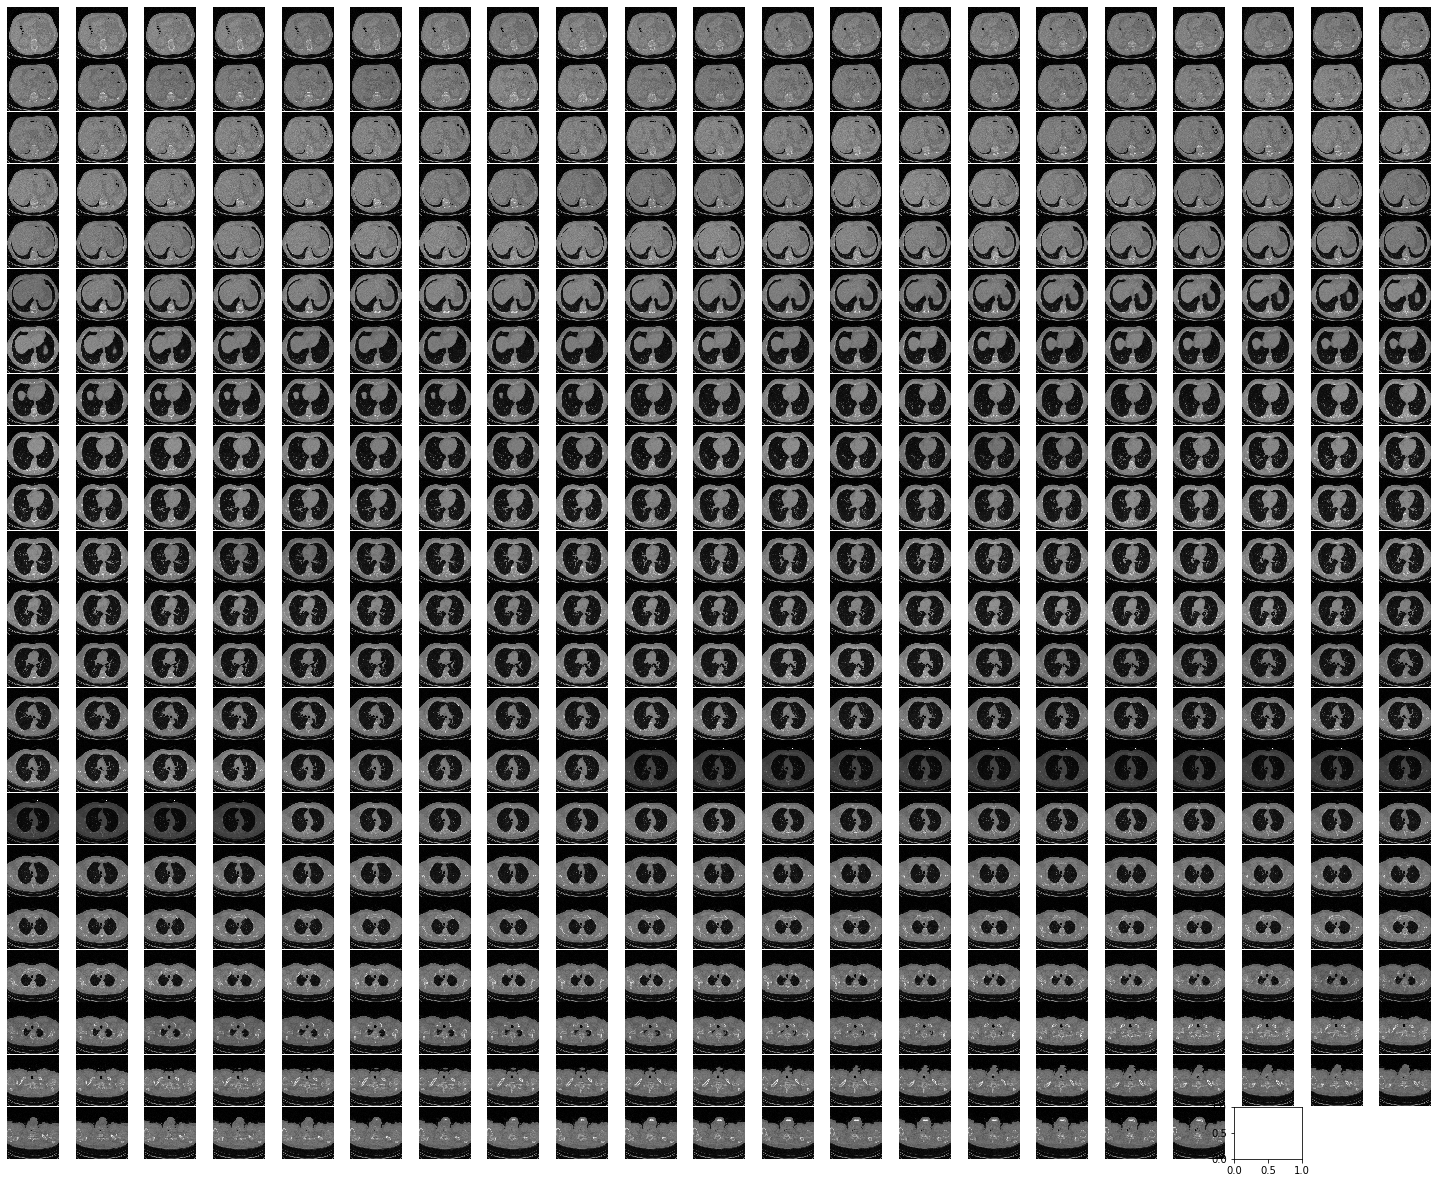

In [147]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage(file_name, sitk.sitkFloat32))
plt.figure(figsize=(20,16))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(ct_scans.shape[1]):
    plt.subplot(22,21,i+1), plt.imshow(ct_scans[i]), plt.axis('off')
    # use plt.savefig(...) here if you want tosave the images as .jpg, e.g.,
plt.show()

In [148]:
print (ct_scan)

[[[-1024 -1024 -1024 ... -1024 -1024  -926]
  [-1024 -1024 -1024 ... -1024  -956  -948]
  [-1024 -1024 -1024 ...  -983  -956  -990]
  ...
  [-1024 -1024 -1024 ...   149   151   185]
  [-1024 -1024 -1024 ...   199   149   172]
  [-1024 -1024 -1024 ...   194   255   224]]

 [[-1024 -1024 -1024 ...  -985  -991  -939]
  [-1024 -1024 -1024 ...  -971  -963  -974]
  [-1024 -1024 -1024 ... -1006  -980 -1003]
  ...
  [-1024 -1024 -1024 ...   107   122   115]
  [-1024 -1024 -1024 ...   117    93   114]
  [-1024 -1024 -1024 ...    89   127   127]]

 [[-1024 -1024 -1024 ...  -978 -1001  -988]
  [-1024 -1024 -1024 ...  -981 -1011 -1001]
  [-1024 -1024 -1024 ... -1024 -1002 -1002]
  ...
  [-1024 -1024 -1024 ...   101   135   110]
  [-1024 -1024 -1024 ...    92    49    83]
  [-1024 -1024 -1024 ...    84    59    79]]

 ...

 [[-1024 -1024 -1024 ...  -993 -1003 -1024]
  [-1024 -1024 -1024 ... -1013 -1012  -975]
  [-1024 -1024 -1024 ...  -983  -954  -936]
  ...
  [-1024 -1024 -1024 ...  -968  -973  -9

[ -987  -985  -975  -993 -1014  -996 -1005 -1024 -1024  -991 -1005 -1024
 -1023 -1024 -1003  -995 -1009 -1015 -1024  -982  -989  -992  -988 -1004
  -986  -995 -1007  -989  -995  -979  -964  -986  -992  -994  -988  -991
  -998  -983  -999 -1005  -985  -965  -990 -1015  -983 -1000 -1013  -977
  -982 -1008  -977  -980 -1006  -983  -973  -992  -916  -826  -746  -552
  -270   -62   -13   -53   -95  -127  -112   -82   -83   -86   -90   -82
  -121  -115  -120  -145  -107  -119  -168  -129  -129  -119   -79   -46
   -76   -98  -102  -120   -96   -87  -138   -94   -53   -19    43    69
    81    71    37    31    43    95   144   148   170   180   148   172
   237   223   145   134   159   219   347   482   516   427   273    17
  -271  -500  -664  -770  -839  -890  -901  -870  -885  -926  -914  -892
  -897  -902  -900  -892  -892  -895  -884  -866  -890  -948  -973  -925
  -890  -898  -898  -917  -934  -942  -953  -949  -955  -953  -942  -937
  -950  -945  -879  -791  -814  -850  -863  -891  -

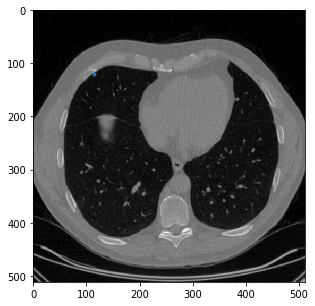

In [149]:
# test
# ct_scan[155][114][120]

ct_scan[155][144][120]
print (ct_scan[155][114])
# ct_scans = sitk.GetArrayFromImage(sitk.ReadImage(file_name, sitk.sitkFloat32))
plt.figure(figsize=(5,5))
plt.imshow(ct_scan[155])
plt.scatter(114, 120, marker=".")
plt.show()

In [150]:
csv_data_21 = pd.read_csv('./Annotations/VESSEL12_21_Annotations.csv', names=('x', 'y', 'z', 'label'))
csv_data_22 = pd.read_csv('./Annotations/VESSEL12_22_Annotations.csv', names=('x', 'y', 'z', 'label'))
csv_data_23 = pd.read_csv('./Annotations/VESSEL12_23_Annotations.csv', names=('x', 'y', 'z', 'label'))

In [151]:
# test
# VESSEL12_21_Annotations.csv

print (csv_data_21[csv_data.label>0].z)

ant_x = list(csv_data_21.query('z == "155" and label == "1"')['x'])
ant_y = list(csv_data_21.query('z == "155" and label == "1"')['y'])
ant_z = list(csv_data_21.query('z == "155" and label == "1"')['z'])

print (len(ant_x))
print (len(ant_y))
print (len(ant_z))

4      155
5      155
7      155
8      155
9      155
      ... 
267    199
268    199
269    199
270    199
272    199
Name: z, Length: 78, dtype: int64
38
38
38


In [167]:
def show_point(csv_data, list_z):
    for i in list_z:
        ant_x = list(csv_data.query(f'z == "{i}" and label == "1"')['x'])
        ant_y = list(csv_data.query(f'z == "{i}" and label == "1"')['y'])

        plt.figure(figsize=(5,5))
        plt.imshow(ct_scan[i])
        plt.scatter(ant_x, ant_y, marker=".")
        plt.show()

# Annotation 21

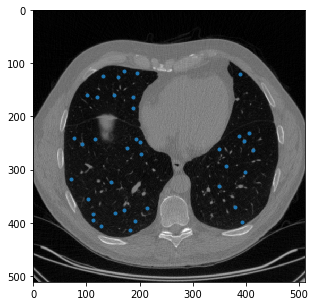

<Figure size 432x288 with 0 Axes>

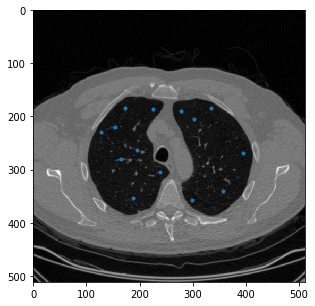

<Figure size 432x288 with 0 Axes>

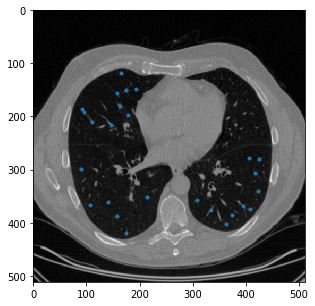

<Figure size 432x288 with 0 Axes>

In [166]:
show_point(csv_data_21, [155, 332, 199])

# Annotation 22

In [ ]:
show_point(csv_data_22, [102, 342 ,162])

In [ ]:
show_point(csv_data_23, [121, 290 ,163])